# User-based Collaborative Filtering

In [1]:
## import packages

%run liblecture.py

from numpy import linalg as LA
import scipy.sparse as sp

## Read Data: movies and ratings

In [2]:
## Read Movies

In [3]:
import pandas as pd
movies = pd.read_csv('./movies_w_imgurl.csv')
movies

,movieId,imdbId,title,genres,imgurl
0,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,https://images-na.ssl-images-amazon.com/images...
1,2,113497,Jumanji (1995),Adventure|Children|Fantasy,https://images-na.ssl-images-amazon.com/images...
2,3,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,4,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,5,113041,Father of the Bride Part II (1995),Comedy,https://images-na.ssl-images-amazon.com/images...
...,...,...,...,...,...
9120,162672,3859980,Mohenjo Daro (2016),Adventure|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
9121,163056,4262980,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,https://images-na.ssl-images-amazon.com/images...
9122,163949,2531318,The Beatles: Eight Days a Week - The Touring Y...,Documentary,https://images-na.ssl-images-amazon.com/images...
9123,164977,27660,The Gay Desperado (1936),Comedy,https://images-na.ssl-images-amazon.com/images...


In [5]:
#Read Rating DAta
ratings = pd.read_csv('ratings-9_1.csv')

train = ratings[ratings['type'] == 'train'][['userId', 'movieId', 'rating']]
test = ratings[ratings['type'] == 'test'][['userId', 'movieId', 'rating']]

## Convert Ratings to User-Item Sparse Matrix

### Create Index to Id Maps

In [6]:
movieIds = train.movieId.unique()

movieIdToIndex = {}
indexToMovieId = {}

colIdx = 0 #유저기반이기 때문에 바뀜
 
for movieId in movieIds:
    movieIdToIndex[movieId] = colIdx
    indexToMovieId[colIdx] = movieId
    colIdx += 1

In [7]:
userIds = train.userId.unique()

userIdToIndex = {}
indexToUserId = {}

rowIdx = 0 #유저기반이기 때문에 바뀜

for userId in userIds:
    userIdToIndex[userId] = rowIdx
    indexToUserId[rowIdx] = userId
    rowIdx += 1

### Creat User-Item Sparse Matrix

In [8]:
rows = []
cols = []
vals = []

for row in train.itertuples():
    rows.append(userIdToIndex[row.userId])
    cols.append(movieIdToIndex[row.movieId])
    vals.append(row.rating)

coomat = sp.coo_matrix((vals, (rows, cols)), shape=(rowIdx, colIdx))

matrix = coomat.todense()
matrix.shape

(671, 8740)

## Compute User-User Similarities

*Compute* $l_2$-norm

In [9]:
norms = LA.norm(matrix, ord = 2, axis=1)
norms.shape

(671,)

Normalize Row Vectors

In [10]:
normmat = np.divide(matrix.T, norms).T
normmat.shape

(671, 8740)

Compute Similarities ( = inner product)

In [11]:
sims = pd.DataFrame(data = np.matmul(normmat, normmat.T), index = userIds, columns=userIds)
sims

,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
1,1.00,0.00e+00,0.00,0.07,0.02,0.00,0.08,0.00,1.38e-02,0.00,...,0.00,0.00,0.02,0.03,0.00,0.00,0.00,6.72e-02,0.00,0.00
2,0.00,1.00e+00,0.10,0.11,0.10,0.00,0.18,0.11,1.18e-01,0.05,...,0.46,0.04,0.07,0.15,0.43,0.35,0.09,6.22e-03,0.15,0.07
3,0.00,1.04e-01,1.00,0.08,0.15,0.04,0.17,0.27,1.43e-01,0.08,...,0.16,0.07,0.14,0.16,0.19,0.10,0.14,8.54e-02,0.11,0.16
4,0.07,1.07e-01,0.08,1.00,0.11,0.07,0.29,0.15,9.89e-03,0.10,...,0.11,0.03,0.11,0.21,0.13,0.07,0.08,9.22e-02,0.04,0.14
5,0.02,1.04e-01,0.15,0.11,1.00,0.07,0.08,0.13,9.35e-02,0.04,...,0.19,0.02,0.11,0.20,0.15,0.03,0.05,2.06e-02,0.06,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.00,3.51e-01,0.10,0.07,0.03,0.00,0.21,0.06,6.84e-02,0.04,...,0.28,0.03,0.07,0.12,0.29,1.00,0.10,1.88e-02,0.16,0.09
668,0.00,8.98e-02,0.14,0.08,0.05,0.02,0.07,0.12,2.02e-01,0.11,...,0.08,0.06,0.10,0.08,0.12,0.10,1.00,0.00e+00,0.15,0.12
669,0.07,6.22e-03,0.09,0.09,0.02,0.02,0.08,0.06,2.95e-02,0.04,...,0.02,0.03,0.08,0.09,0.03,0.02,0.00,1.00e+00,0.05,0.09
670,0.00,1.46e-01,0.11,0.04,0.06,0.00,0.06,0.22,3.38e-01,0.15,...,0.14,0.10,0.10,0.11,0.19,0.16,0.15,4.84e-02,1.00,0.22



## Similarity Example

In [13]:
userId = 33
topK = 5 #몇 개의 영화 확인

In [14]:
simUsers = sims.loc[userId, :].sort_values(ascending=False).head(6).tail(5)
simUsers

598    0.20
457    0.20
350    0.19
461    0.19
15     0.18
Name: 33, dtype: float64

show liked user movies

In [15]:
def displayLikedUserMovies(movies, userId, topK):
    topKRatings = train[train['userId'] == userId].sort_values(by='rating', ascending=False).head(topK)
    display(HTML(f"<h3>{userId}</h3><hr>"))
    displayMovies(movies, topKRatings.movieId.values, topKRatings.rating.values)

In [16]:
for index, simUser in simUsers.iteritems(): #선정된 유저끼리 비교
    displayLikedUserMovies(movies, index, topK) #함수 호출

## User Rating Prediction


In [17]:
#set test user
userId = 33

### Predict Ratings

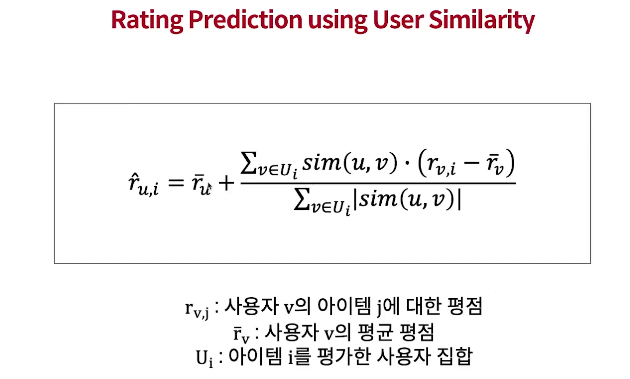

In [18]:
ratingDF = pd.DataFrame(data=matrix, index= userIds, columns = movieIds) #데이터 프레임 구성
binDF = ratingDF.applymap(lambda x: math.ceil(x/10))#rating이 있는 곳에만 1

In [23]:
binDF

,31,1061,1129,1172,1287,1293,1339,1343,1371,1405,...,134528,134783,137595,138204,60832,64997,72380,129,4736,6425
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
userAvgRatings = pd.DataFrame(data= ratingDF.sum(axis=1).divide(binDF.sum(axis=1)), columns=['avg'])
#평균값으로 구해진다.
userAvgRatings

,avg
1,2.69
2,3.47
3,3.60
4,4.36
5,3.89
...,...
667,3.67
668,3.83
669,3.35
670,3.72


In [20]:
simUsers = sims.loc[userId, :]
simUsers[userId]=0


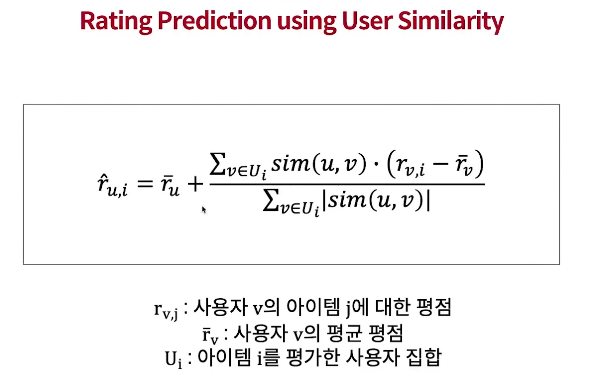

In [22]:
#1차원 값이기에 사칙연산이 가능하도록!
simRatingSums = (ratingDF - binDF.T.multiply(userAvgRatings['avg']).T).T.multiply(simUsers).T.sum(axis=0)
#weight된 rating이 나온다
simSums = binDF.T.multiply(simUsers).T.sum(axis=0)
recItemRatings = userAvgRatings.loc[userId].avg + pd.Series(data = simRatingSums.divide(simSums), name='pred')
recItemRatings.fillna(0, inplace=True)

recItemRatings

31       2.84
1061     3.44
1129     3.15
1172     3.80
1287     3.68
         ... 
64997    1.96
72380    2.96
129      2.97
4736     0.97
6425     0.41
Name: pred, Length: 8740, dtype: float64

### Compute(MAE, RMSE)

In [24]:
userTestRatings = pd.DataFrame(data=test[test['userId'] == userId])

temp = userTestRatings.join(recItemRatings.loc[userTestRatings['movieId']], on='movieId')

mae = getMAE(temp['rating'], temp['pred'])
rmse = getRMSE(temp['rating'], temp['pred'])

print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE : 0.5524
RMSE: 0.6825


In [25]:
temp

,userId,movieId,rating,pred
6187,33,1060,4.0,4.00
6198,33,1291,4.0,3.67
6199,33,1347,2.0,3.34
6208,33,1982,4.0,3.45
6212,33,2005,4.0,3.60
6215,33,2064,5.0,4.00
6257,33,3794,4.0,3.27
6292,33,4678,3.0,3.54
6303,33,4974,3.0,2.91
